# Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

!pip install squarify
import squarify

warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Unigap/Python/K33_Phung Thi Ngoc_Python_Project 3/'

Mounted at /content/drive


In [ ]:
ecommerce_retail = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='ecommerce retail')

# Part 1: EDA

## 1.1 Understand about the data

### Get infor about data type & data value

In [ ]:
# info() giup dectect loai du lieu cua tung cot
print(ecommerce_retail.info())

# Detect data value cua cac cot (mean, min, max, std, ...)
print(ecommerce_retail.describe())

ecommerce_retail.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Using ProfileReport to Understand more abour Category Data Type

### Detect lý do cột data value bất hợp lý (Quantity < 0) và (Unit Price < 0)

In [ ]:
# quick check ly do Quantity < 0
print("Print mot so dong du lieu co Quantity < 0")
print(ecommerce_retail[ecommerce_retail['Quantity'] < 0].head())
print('')

# check ly do cot Quantity < 0 co phai do giao dich bi cancel hay k
ecommerce_retail['InvoiceNo'] = ecommerce_retail['InvoiceNo'].astype(str)
ecommerce_retail['check_cancel'] = ecommerce_retail['InvoiceNo'].apply(lambda x: True if x.startswith('C') else False)

print(ecommerce_retail[(ecommerce_retail['Quantity'] < 0) & (ecommerce_retail['check_cancel'] == True)].head())

print('')
print(ecommerce_retail[(ecommerce_retail['Quantity'] < 0) & (ecommerce_retail['check_cancel'] != True)].head())

Print mot so dong du lieu co Quantity < 0
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1  

In [ ]:
print(f"Unit Price có {ecommerce_retail[ecommerce_retail['UnitPrice'] < 0].shape[0]} dòng dữ liệu với giá trị không hợp lệ")
print(ecommerce_retail[ecommerce_retail['UnitPrice'] < 0].head())

Unit Price có 2 dòng dữ liệu với giá trị không hợp lệ
       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  check_cancel  
299983  -11062.06         NaN  United Kingdom         False  
299984  -11062.06         NaN  United Kingdom         False  


Nhận xét chung:


*   Data type: InvoiceNo, StockCode, Description, Country sai datatype --> Action: Convert from object to string
*   Data value: UnitPrice, Quantity chứa giá trị không hợp lệ <0 với một số giá trị do là đơn đã cancel --> Action: Drop data chứa giá trị < 0, drop data bị cancel



### Xử lý data type và data value không hợp lý

In [ ]:
# Change data type
column_list = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for column in column_list:
  ecommerce_retail[column] = ecommerce_retail[column].astype(str)

# Drop data value không hợp lệ
ecommerce_retail = ecommerce_retail[ecommerce_retail['Quantity'] > 0]

ecommerce_retail = ecommerce_retail[ecommerce_retail['UnitPrice'] > 0]

ecommerce_retail = ecommerce_retail[ecommerce_retail['check_cancel'] == False]

ecommerce_retail.shape


(530104, 9)

In [ ]:
ecommerce_retail.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
check_cancel,bool


## 1.2. Xử lý Missing Value, Duplicates

### Thống kê những cột có missing value

In [ ]:
# check missing value có trong data
ecommerce_retail.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132220
Country,0
check_cancel,0


Nhận xét:


* Missing Data: 132220 rows (~20%) in CustomerID Column
* Hypothesis

1.   Hóa đơn chứa nhiều sản phẩm, nhưng hệ thống chỉ lưu CustomerID một lần thay vì trên tất cả các dòng.
2.   Dữ liệu k đc ghi nhận đầy đủ






### Check if customer code has previously existed in the same invoice

In [ ]:
# Check if customer code has previously existed in the same invoice
tmp = ecommerce_retail[ecommerce_retail['CustomerID'].isna()]

ecommerce_retail[(ecommerce_retail['InvoiceNo'].isin(tmp['InvoiceNo'])) & (~ecommerce_retail['CustomerID'].isna())]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel


### Xử lý missing value

In [ ]:
# Drop 20% missing value
ecommerce_retail = ecommerce_retail.dropna(subset=['CustomerID'])

ecommerce_retail.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
check_cancel,0


### Check duplicates

In [ ]:
# Check duplicate value trong dataset
duplicates = ecommerce_retail.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'])
print(ecommerce_retail[duplicates].shape)

print('')

print(ecommerce_retail.shape)

(10038, 9)

(397884, 9)




Nhận xét: 10038 duplicates, PK(InvoiceNo, StockCode, InvoiceDate, CustomerID). InvoiceDate đảm bảo mỗi giao dịch là duy nhât theo tgian/kiểm soát lỗi nhập liệu

Hypothesis:


*  Khách hàng mua 1 sản phẩm nhiều lần trong cùng 1 đơn hàng
*  Lỗi nhập liệu trong quá trình ghi nhận đơn

--> Next step: Drop





In [ ]:
print(ecommerce_retail[duplicates].head())

print('')

print(ecommerce_retail[(ecommerce_retail['InvoiceNo'] == '536381') & (ecommerce_retail['StockCode'] == '71270')])

print(ecommerce_retail[(ecommerce_retail['InvoiceNo'] == '536409') & (ecommerce_retail['StockCode'] == '90199C')])

    InvoiceNo StockCode                      Description  Quantity  \
125    536381     71270                  PHOTO CLIP LINE         3   
498    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         1   
502    536409     85116  BLACK CANDELABRA T-LIGHT HOLDER         5   
517    536409     21866      UNION JACK FLAG LUGGAGE TAG         1   
525    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         2   

            InvoiceDate  UnitPrice  CustomerID         Country  check_cancel  
125 2010-12-01 09:41:00       1.25     15311.0  United Kingdom         False  
498 2010-12-01 11:45:00       6.35     17908.0  United Kingdom         False  
502 2010-12-01 11:45:00       2.10     17908.0  United Kingdom         False  
517 2010-12-01 11:45:00       1.25     17908.0  United Kingdom         False  
525 2010-12-01 11:45:00       6.35     17908.0  United Kingdom         False  

    InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
113    536381     71270  PHOTO

### Xử lý duplicate

In [ ]:
ecommerce_retail = ecommerce_retail.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'])

ecommerce_retail.shape

(387846, 9)

# Part 2: Data Processing

In [ ]:
ecommerce_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


## 2.1. Define R, F, M Variable

In [ ]:
# Create TotalPrice column
ecommerce_retail['TotalPrice'] = ecommerce_retail['Quantity'] * ecommerce_retail['UnitPrice']

# Caculate Recency, Frequency, Monetory
rfm = ecommerce_retail.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ecommerce_retail['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency','Frequency','Monetory']

rfm

,Recency,Frequency,Monetory
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,27,1595.64
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [ ]:
# Get R, F, M score using qcut
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetory'], 5, labels=[1,2,3,4,5])

# Concatenate R, F, M score into RFM score
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

rfm


,Recency,Frequency,Monetory,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,1,182,4310.00,5,5,5,555
12348.0,74,27,1595.64,2,2,4,224
12349.0,18,73,1757.55,4,4,4,444
12350.0,309,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,111
18281.0,180,7,80.82,1,1,1,111
18282.0,7,12,178.05,5,1,1,511


## 2.2. Split each RFM score into single rows in segmentation

In [ ]:
# Split each RFM score into single rows in segmentation
segmentation = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='Segmentation')

# Convert values in RFM Score column into list
segmentation['RFM Score'] = segmentation['RFM Score'].str.split(',')

segmentation = segmentation.explode('RFM Score')

segmentation['RFM Score'] = segmentation['RFM Score'].str.strip()

segmentation.columns = ['Segment','RFM_Score']

segmentation.head()

,Segment,RFM_Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454


## 2.3. Assign segmentation for each customer_id

In [ ]:
# Assign segmentation for each customer_id

rfm = rfm.reset_index()

cus_segmentation = rfm.merge(segmentation, on='RFM_Score', how='left')

cus_segmentation.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM_Score,Segment
0,12346.0,325,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347.0,1,182,4310.00,5,5,5,555,Champions
2,12348.0,74,27,1595.64,2,2,4,224,At Risk
3,12349.0,18,73,1757.55,4,4,4,444,Loyal
4,12350.0,309,17,334.40,1,2,2,122,Hibernating customers


# Part 3: Visualization & Insights

In [ ]:
# Calculate number of customers share and Monetory share
segmentation_data = cus_segmentation.groupby('Segment').agg(
    CustomerCount=('CustomerID', 'count'),
    SumMonetory=('Monetory', 'sum'),
    AvgFrequency=('Frequency', 'mean'),
    AvgRecency=('Recency', 'mean')).round(1).reset_index()

segmentation_data['CustomerShare'] = (segmentation_data['CustomerCount'] * 100 / segmentation_data['CustomerCount'].sum()).round(2)
segmentation_data['MonetoryShare'] = (segmentation_data['SumMonetory'] * 100 / segmentation_data['SumMonetory'].sum()).round(2)

segmentation_data.sort_values(by='MonetoryShare', ascending=False)


,Segment,CustomerCount,SumMonetory,AvgFrequency,AvgRecency,CustomerShare,MonetoryShare
3,Champions,803,5461873.0,280.2,10.6,18.51,61.75
6,Loyal,413,974897.4,117.0,37.6,9.52,11.02
1,At Risk,408,627816.0,79.5,153.0,9.41,7.10
7,Need Attention,232,342273.2,56.5,32.1,5.35,3.87
10,Promising,137,327402.7,16.5,17.9,3.16,3.70
4,Hibernating customers,799,318970.1,23.3,149.5,18.42,3.61
2,Cannot Lose Them,93,300205.7,49.6,220.8,2.14,3.39
9,Potential Loyalist,512,295177.4,59.6,27.8,11.80,3.34
5,Lost customers,437,77613.5,11.9,277.6,10.07,0.88
8,New Customers,314,64872.3,11.3,28.3,7.24,0.73


## 3.1. Visualize Recency, Frequency, Monetory and Number of Customers by segments

In [ ]:
# Set color palette
color1= sns.color_palette('GnBu',11)

### 3.1.1. Visualize Average Recency by RFM segments

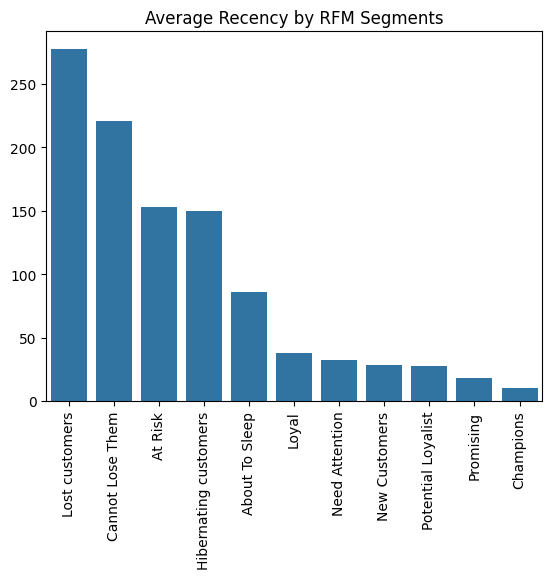

In [ ]:
# Visualize Average Recency by RFM segments
Recency_Chart = sns.barplot(x='Segment', y='AvgRecency', data=segmentation_data.sort_values(by='AvgRecency', ascending=False))
Recency_Chart.set_title('Average Recency by RFM Segments')

Recency_Chart.set(xlabel='', ylabel='')

plt.xticks(rotation=90)
plt.show()

*Comment*

* Segments with the most recent purchase
date: Champions (10.6 days), Promising (17.9 days) and Potential Loyalist (27.8 days)

* Segments that have not returned to buy for a long time: Lost customers (277.6 days), Cannot Lose Them (220.8 days) and At Risk (153 days)

### 3.1.2. Visualize Average Frequency by RFM segments

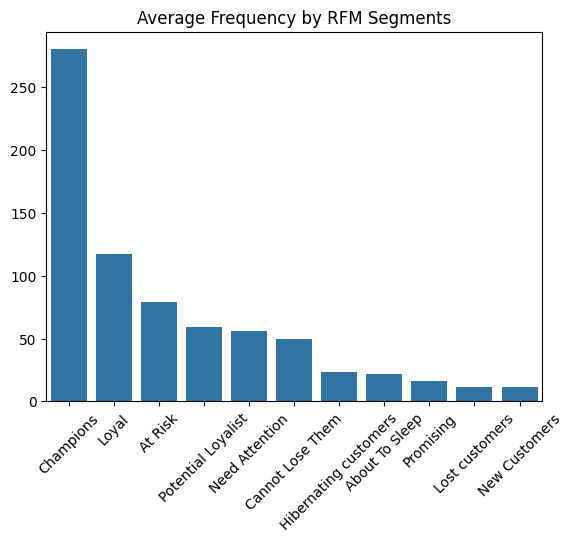

In [ ]:
Frequency_Chart = sns.barplot(x='Segment', y='AvgFrequency', data=segmentation_data.sort_values(by='AvgFrequency', ascending=False))
Frequency_Chart.set_title('Average Frequency by RFM Segments')

Frequency_Chart.set(xlabel='', ylabel='')

plt.xticks(rotation=45)
plt.show()

*Comment*

* Most frequent purchase segments: Champions (280.2 times), Loyal (117.0 times), At Risk (79.5 times)
* Segments with the lowest number of orders: Lost customers (11.9 times), New Customers (11.3 times)
* The number of orders of the Champions segment is 24.8 times higher than that of the Lost customers segment

### 3.1.3. Visualize total sales by segments

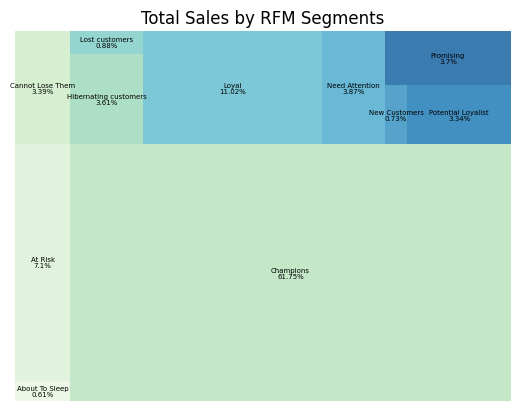

In [ ]:
# Visualize Total sales by segments
Sales_Map = squarify.plot(sizes=segmentation_data['MonetoryShare'],
                          label=segmentation_data['Segment'],
                          color=color1,
                          alpha=.8,
                          text_kwargs={'fontsize':5},
                          value=[f'{x}%' for x in segmentation_data['MonetoryShare']])


plt.axis('off')
plt.title('Total Sales by RFM Segments')
plt.show()

*Comment*

* Segments with the highest total revenue: Champions (5461873.0	 dollars, equivalent to 61.75%) and Loyal (974897.4	dollars, equivalent to 11.02%)
* Segments with low total revenue: New Customers (64872.3	 dollars, equivalent to 0.73%), About To Sleep (53698.1 dollars, equivalent to 0.61%)
* The revenue of the Champions segment is 101.2 times that of the About To Sleep segment.

### 3.1.3. Visualize Number of customers by segments

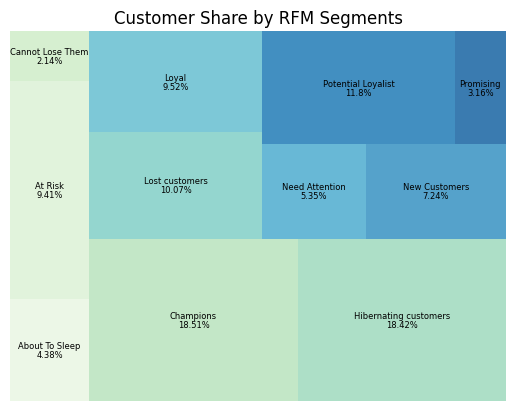

In [ ]:
# Visualize Customer Share by segments
Customer_Map = squarify.plot(sizes=segmentation_data['CustomerShare'],
                             label=segmentation_data['Segment'],
                             color=color1,
                             alpha=.8,
                             text_kwargs={'fontsize':6},
                             value=[f'{x}%' for x in segmentation_data['CustomerShare']])


plt.axis('off')
plt.title('Customer Share by RFM Segments')
plt.show()



*Comment*

* Segments with the highest customer share: Champions (18.51%), Hibernating Customers (18.42%), and Potential Loyalist (11.8%).

* Segments with the lowest customer share: Cannot Lose Them (2.14%), Promising (3.16%), and About To Sleep (4.38%).

* The customer share of the Champions segment is approximately 8.66 times that of the Cannot Lose Them segment.



### 3.1.4. Describe Recency, Frequency and Monetory

In [ ]:
RFM_Discribe = cus_segmentation[['Recency', 'Frequency', 'Monetory']].describe().round(1)
RFM_Discribe

,Recency,Frequency,Monetory
count,4338.0,4338.0,4338.0
mean,91.5,89.4,2038.9
std,100.0,222.3,8976.6
min,0.0,1.0,3.8
25%,17.0,17.0,305.1
50%,50.0,41.0,658.8
75%,141.0,97.0,1647.9
max,373.0,7477.0,280206.0


### 3.1.5. Insights and recommendations


*1. Recency, Frequency and Monetory value of Superstore:*

* As a retailer, Superstore may prioritize Recency and Frequency over Monetary value because customer engagement and retention are often more critical to long-term success than just individual spending.
* Customers last purchased an average of 91.5 days ago, but half made purchases within 50 days. This suggests a mix of highly engaged and inactive customers.
* The average number of transactions per customer is 89.4, but a high standard deviation of 222.3 indicates significant variability—some buy frequently, while others purchase sporadically.

-->  Those are some warnings for Superstore to focus more on Recency and Frequency performance.

*2. Segments of Superstore:*

* 3 segments with the highest proportion of customers are Champions (18.51%), Hibernating customers (18.42%) and Potential Loyalist (11.8%)
* Negative segments such as Hibernating and Lost accounted for a high proportion of customers, 18.42% and 10.07%, respectively. However, these two groups account for less than 5% of revenue
* The two most positive segments account for less than 19% of the proportion of customers (Champions, 8.98%, and Loyal, 9.52%).
* Potential Loyalist (the ideal segment) has the highest proportion of customers (11.8%), but its revenue proportion is only 3.34%. Meanwhile, the negative segment, At Risk, accounts for 7.1% of revenue
⇒ In this Christmas - New Year marketing campaign, SuperStore needs to prioritize their efforts to promote the Potential Loyalist group to become Loyal and Champions, and find ways to reconnect with customers in the At Risk and Hibernating group.

*Recommendation*
1. **Potential Loyalists → Loyal & Champions**

Goal -- Encourage repeat purchases and increase brand attachment.

* Exclusive Holiday Offers: Send personalized discounts on past purchases or trending seasonal items.

* VIP Early Access: Allow early shopping for holiday collections or limited-time products.

* Gift Bundles & Rewards: Offer bundled products or extra loyalty points for purchases above a certain amount.

2. **At Risk Customers → Re-engagement**

Goal -- Win back disengaged customers and reignite their shopping habits.

* Personalized Win-Back Emails: Send customized messages highlighting special discounts based on past purchases.

* Limited-Time Deals: Use urgency (e.g., “Last chance for holiday rewards!”) to encourage immediate action.

* Festive Event Invitations: Host exclusive online or in-store holiday events with gift incentives for
participation.

3. **Hibernating Customers → Revive Interaction**

Goal -- Reintroduce them to the brand and encourage engagement.

* Special Re-Engagement Campaigns: “We Miss You” emails with a unique discount to welcome them back.

* Gamified Offers: Implement interactive promotions like scratch-and-win deals or bonus points for completing small actions.

* Gift Incentives on Purchase: Surprise giveaways or exclusive gifts for their first purchase after re-engagement.

* Surveys & Feedback Requests: Understand reasons for disengagement and adjust strategy accordingly.

## 3.2. Detect Potential Loyalist

In [ ]:
# Filter the information of Potential Loyalist
Potential_Loyalist = ecommerce_retail.merge(cus_segmentation[cus_segmentation['Segment'] == 'Potential Loyalist'][['CustomerID']], on='CustomerID', how='inner')

Potential_Loyalist['Year'] = Potential_Loyalist['InvoiceDate'].dt.year
Potential_Loyalist['Month'] = Potential_Loyalist['InvoiceDate'].dt.month

Potential_Loyalist.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel,TotalPrice,Year,Month
0,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,2010-12-01 09:56:00,19.95,17420.0,United Kingdom,False,19.95,2010,12
1,536385,22961,JAM MAKING SET PRINTED,12,2010-12-01 09:56:00,1.45,17420.0,United Kingdom,False,17.40,2010,12
2,536385,22960,JAM MAKING SET WITH JARS,6,2010-12-01 09:56:00,4.25,17420.0,United Kingdom,False,25.50,2010,12
3,536385,22663,JUMBO BAG DOLLY GIRL DESIGN,10,2010-12-01 09:56:00,1.95,17420.0,United Kingdom,False,19.50,2010,12
4,536385,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-01 09:56:00,1.25,17420.0,United Kingdom,False,15.00,2010,12


In [ ]:
# Calculate orders count, sales, cart value by year
PL_Order = Potential_Loyalist.groupby('Year').agg(Ord_Count=('InvoiceNo', 'nunique'),
                                                  Sales=('TotalPrice', 'sum')).reset_index()

PL_Order['Cart_Value'] = PL_Order['Sales'] / PL_Order['Ord_Count']

PL_Order

,Year,Ord_Count,Sales,Cart_Value
0,2010,66,12799.950,193.938636
1,2011,1207,282377.461,233.949843


In [ ]:
monthly_data = Potential_Loyalist.groupby(['Year', 'Month']).agg(Ord_Count=('InvoiceNo', 'nunique'),
                                                                Sales=('TotalPrice', 'sum')).reset_index()

monthly_data['Cart_Value'] = monthly_data['Sales'] / monthly_data['Ord_Count']

monthly_data['Year_Month'] = monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str)

monthly_data


,Year,Month,Ord_Count,Sales,Cart_Value,Year_Month
0,2010,12,66,12799.950,193.938636,2010-12
1,2011,1,29,5267.920,181.652414,2011-1
2,2011,2,32,7167.280,223.977500,2011-2
3,2011,3,50,9528.440,190.568800,2011-3
4,2011,4,52,9419.830,181.150577,2011-4
5,2011,5,59,12037.270,204.021525,2011-5
6,2011,6,68,12082.050,177.677206,2011-6
7,2011,7,62,10842.581,174.880339,2011-7
8,2011,8,57,10983.210,192.687895,2011-8
9,2011,9,105,26215.900,249.675238,2011-9


### 3.2.1. Visualize Sales and Cart Value by month

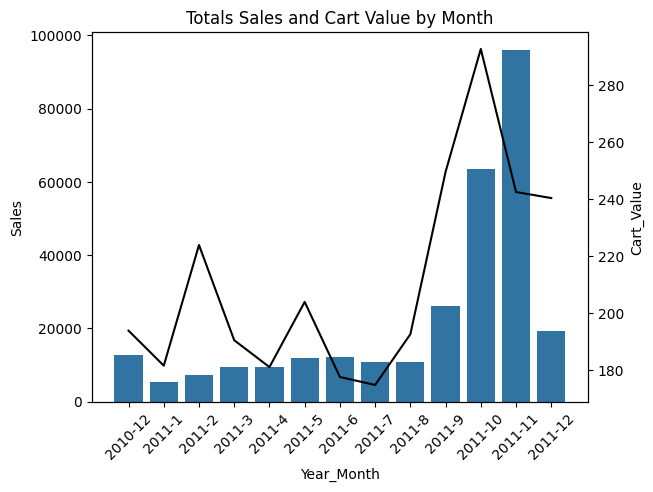

In [ ]:
# Visualize sales and cart_value by month
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(data=monthly_data, x='Year_Month', y='Sales', ax=ax1)
sns.lineplot(data=monthly_data, x='Year_Month', y='Cart_Value', ax=ax2,  color = 'black')

ax1.set_title('Totals Sales and Cart Value by Month')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.show()


*Comment*
* Sales increased significantly from early 2011, peaking in November 2011.
* The Cart Value peaked in October 2011 (~280), indicating customers were adding more items per purchase, which is a positive sign for potential long-term loyalty.
* The highest sales in November 2011 may be influenced by holiday shopping trends. This suggests customers are responding well to seasonal promotions.

### 3.2.2. Visualize Order Count by month

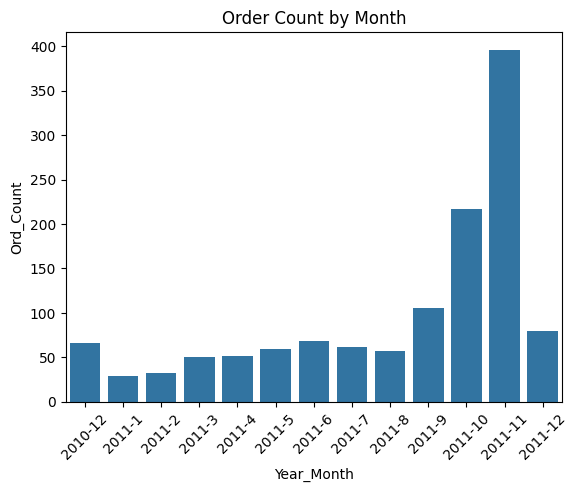

In [ ]:
# Visualize order count by month
sns.barplot(data=monthly_data, x='Year_Month', y='Ord_Count')

plt.title('Order Count by Month')
plt.xticks(rotation=45)

plt.show()

*Comment*
* From September 2011, the number of orders grew sharply, peaking in November 2011 with approximately 400 orders - indicating strong customer interest and engagement.
* The sharp rise suggests seasonal influences or successful marketing efforts driving purchases.
* A significant decline to around 100 orders in December might indicate the need for post-holiday retention strategies.

### 3.2.3. Insights and recommendations
* Offer special pricing on their next purchase within 30 - 60 days.
* Encourage signup for tiered loyalty benefits.
* Encourage signup for tiered loyalty benefits.
* Bundle product deals to encourage upselling.
* Threshold-based incentives (free shipping for larger purchases).